In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from notebooks.analytics.utils import init_analysis, set_save_folder
import seaborn as sns

declust_3 = init_analysis(f"daeclust_16-clusters-selection")
declust_3["label"] = "3 std"
declust_2 = init_analysis(f"daeclust_17_00-clusters-selection")
declust_2["label"] = "2 std"
declust_mix = init_analysis(f"daeclust_20_01-clusters")
declust_mix["label"] = "Mix of 1, 2, 3 std"

set_save_folder("cluster_count")
all_selections = pd.concat([declust_3, declust_2, declust_mix])

In [2]:
selection_cluster_count = all_selections.groupby(["round_id", "label"])["cluster_id"].nunique().rename("cluster_count")

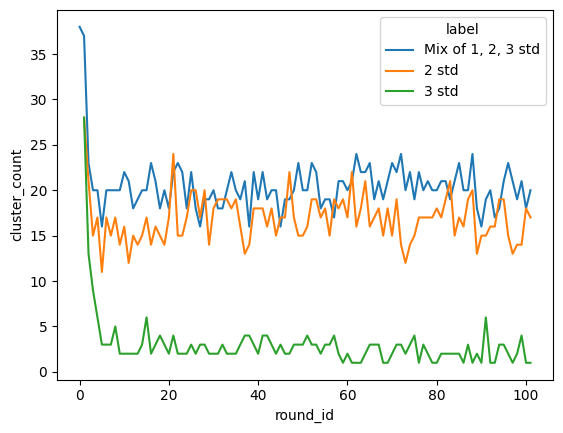

In [3]:
from notebooks.analytics.utils import savefig

ax = sns.lineplot(selection_cluster_count.reset_index(), x="round_id", y="cluster_count", hue="label")

plt.show()

In [25]:
declust_3 = init_analysis(f"daeclust_16-clusters")
declust_3["label"] = "3 std"
declust_2 = init_analysis(f"daeclust_17_00-clusters")
declust_2["label"] = "2 std"
declust_mix = init_analysis(f"daeclust_20_01-clusters")
declust_mix["label"] = "Divers std"
set_save_folder("cluster_count")
all_training = pd.concat([declust_3, declust_2, declust_mix])

In [27]:
training_cluster_count = all_training.groupby(["round_id", "label"])["cluster_id"].nunique().rename("cluster_count")
training_cluster_count

round_id  label     
0.0       2 std         38
          3 std         38
          Divers std    38
1.0       2 std         35
          3 std         35
                        ..
100.0     3 std          1
          Divers std    18
101.0     2 std         16
          3 std          1
          Divers std    20
Name: cluster_count, Length: 306, dtype: int64

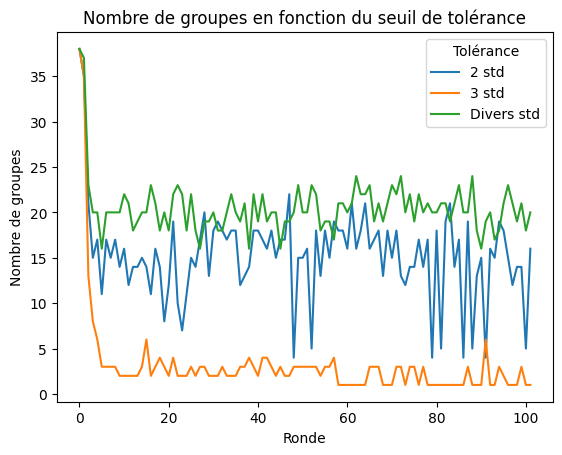

In [28]:
ax = sns.lineplot(training_cluster_count.reset_index(), x="round_id", y="cluster_count", hue="label")

plt.ylabel("Nombre de groupes")
plt.xlabel("Ronde")
plt.title("Nombre de groupes en fonction du seuil de tolérance")
plt.legend(title="Tolérance")

savefig(plt, "n_clusters")
plt.show()

In [7]:

selection_cluster_count = selection_cluster_count.reset_index()

cluster_death_rate = training_cluster_count.reset_index().merge(selection_cluster_count , on=["round_id", "label"], suffixes=("_training", "_selection"))

In [8]:
cluster_death_rate["survival_rate"] = cluster_death_rate["cluster_count_training"] / cluster_death_rate["cluster_count_selection"]

In [9]:
cluster_death_rate

,round_id,label,cluster_count_training,cluster_count_selection,survival_rate


<AxesSubplot: >

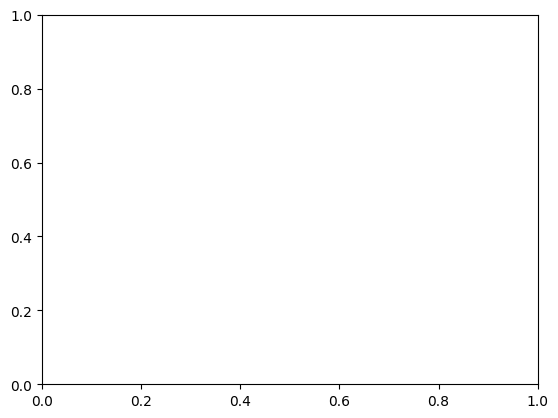

In [10]:
sns.lineplot(cluster_death_rate, x="round_id", y="survival_rate", hue="label")

In [19]:
exp_name = "daeclust_2000_07-clusters"
exp_name = "daeclust_16_01-clusters"
df = init_analysis(exp_name)


In [20]:
df.groupby(["round_id"])["cluster_id"].nunique()

round_id
0.0      38
1.0      34
2.0       9
3.0       5
4.0       6
         ..
97.0      3
98.0      1
99.0      1
100.0     1
101.0     2
Name: cluster_id, Length: 102, dtype: int64

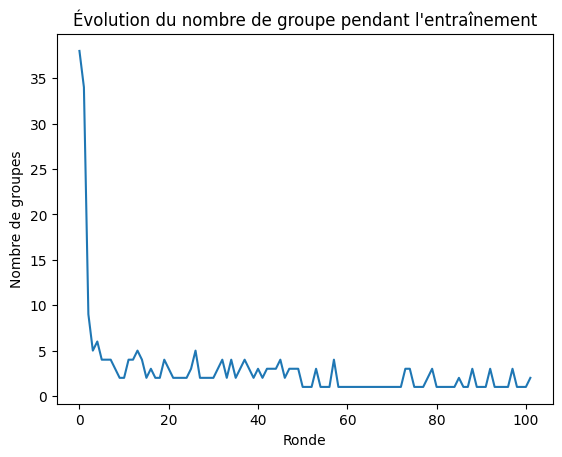

In [21]:
training_cluster_count = df.groupby(["round_id"])["cluster_id"].nunique().rename("cluster_count")

ax = sns.lineplot(training_cluster_count.reset_index(), x="round_id", y="cluster_count")
plt.ylabel("Nombre de groupes")
plt.xlabel("Ronde")
plt.title("Évolution du nombre de groupe pendant l'entraînement")
plt.show()